In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Diwali Sales.csv', encoding = 'unicode_escape')
print(df.head(10))

   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   
5  1000588       Joni  P00057942      M     26-35   28               1   
6  1001132       Balk  P00018042      F     18-25   25               1   
7  1002092   Shivangi  P00273442      F       55+   61               0   
8  1003224     Kushal  P00205642      M     26-35   35               0   
9  1003650      Ginny  P00031142      F     26-35   26               1   

              State      Zone       Occupation Product_Category  Orders  \
0       Maharashtra   Western       Healthcare             Auto       1   
1    Andhra Pradesh  Southern      

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [4]:
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [5]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df['Amount']=df['Amount'].astype('int')

In [8]:
df['Amount'].describe()

count    11239.000000
mean      9453.610553
std       5222.355168
min        188.000000
25%       5443.000000
50%       8109.000000
75%      12675.000000
max      23952.000000
Name: Amount, dtype: float64

In [9]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [10]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

__Analyze By Gender__

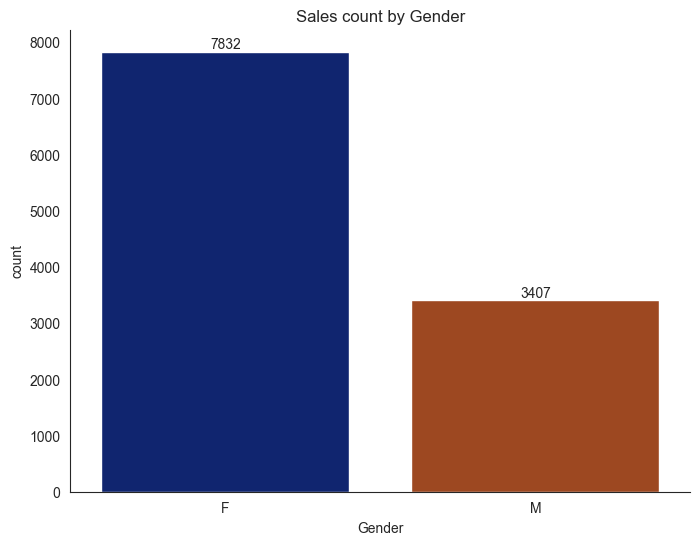

In [11]:
plt.figure(figsize=(8,6))
sns.set_style("white")
ax = sns.countplot(x= 'Gender' , data =df, hue = 'Gender', palette = 'dark', legend = False)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Sales count by Gender")
sns.despine()
plt.show()

In [12]:
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
print(sales_gen)

  Gender    Amount
0      F  74335853
1      M  31913276


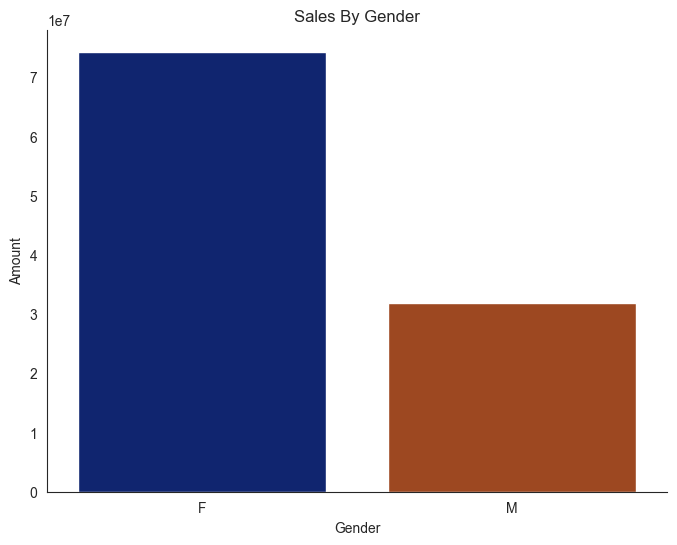

In [13]:
plt.figure(figsize=(8,6))
sns.set_style("white")
sns.barplot(x = 'Gender', y = 'Amount' , hue = 'Gender',data = sales_gen, palette = 'dark', legend = False)
sns.despine()
plt.title("Sales By Gender")
plt.show()

**Analyze by Age Group**

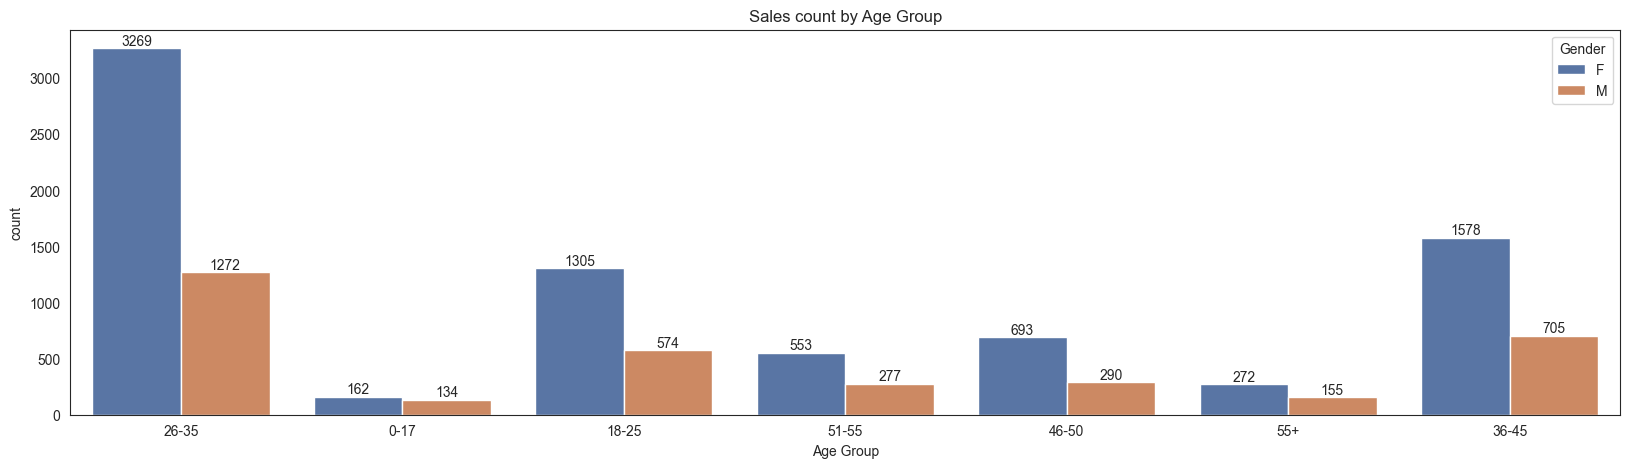

In [14]:
plt.figure(figsize=(20,5))
ax1 = sns.countplot(x= 'Age Group', data=df,  hue = 'Gender',palette='deep')
for bars  in ax1.containers:
    ax1.bar_label(bars)
plt.title("Sales count by Age Group")
plt.show()

In [15]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending = False)
print(sales_age)

  Age Group    Amount
2     26-35  42613442
3     36-45  22144994
1     18-25  17240732
4     46-50   9207844
5     51-55   8261477
6       55+   4080987
0      0-17   2699653


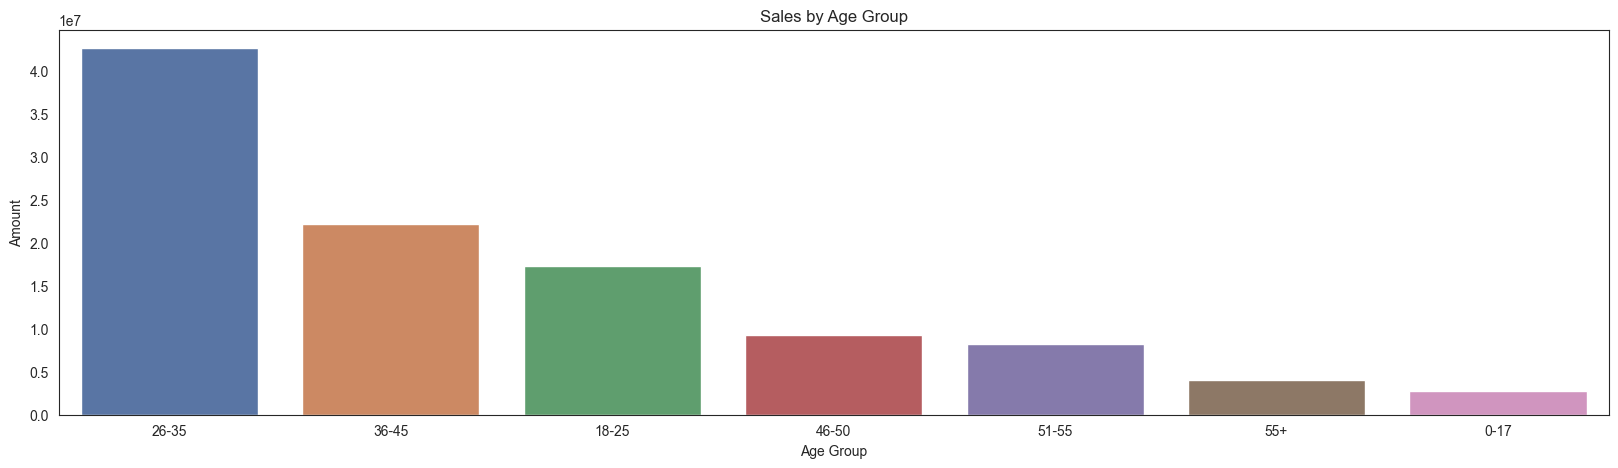

In [16]:
plt.figure(figsize=(20,5))
sns.barplot(x='Age Group' , y = 'Amount',hue = 'Age Group', data = sales_age, palette='deep')
plt.title("Sales by Age Group")
plt.show()

__Analyze By State__

In [17]:
sales_state=df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
print(sales_state)

               State  Orders
14     Uttar Pradesh    4807
10       Maharashtra    3810
7          Karnataka    3240
2              Delhi    2740
9     Madhya Pradesh    2252
0     Andhra Pradesh    2051
5   Himachal Pradesh    1568
8             Kerala    1137
4            Haryana    1109
3            Gujarat    1066


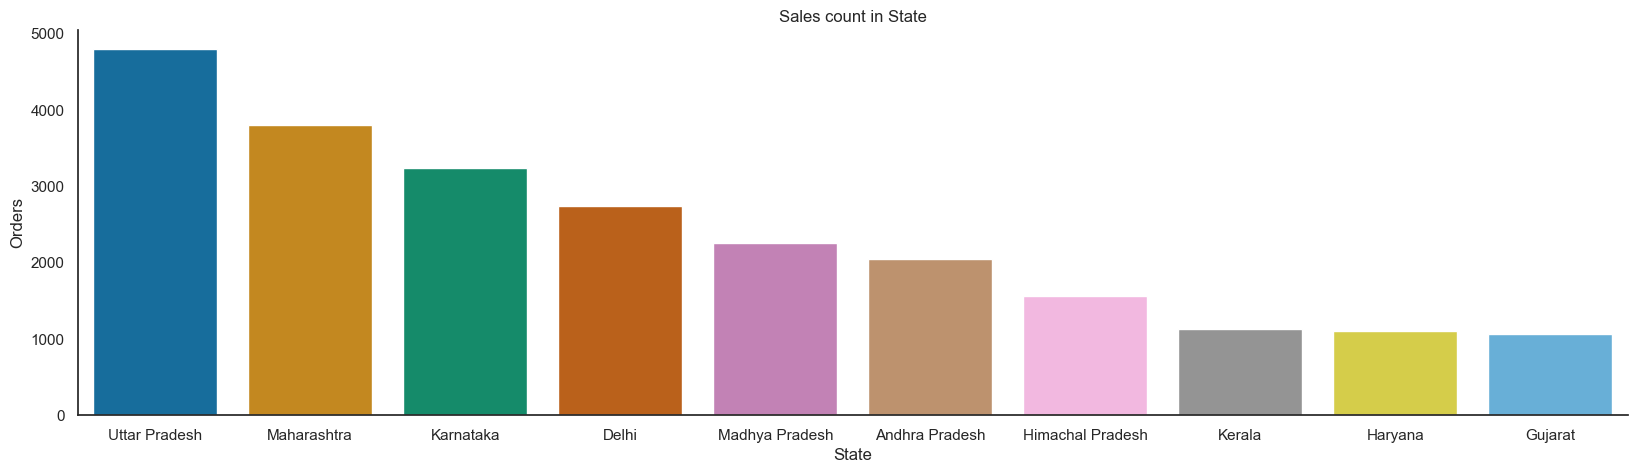

In [18]:
sns.set(rc={'figure.figsize':(20,5)})
sns.set_style("white")
sns.barplot(data=sales_state, x='State',y='Orders',hue = 'State', palette='colorblind')
plt.title("Sales count in State")
sns.despine()
plt.show()

In [19]:
Sales_State=df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

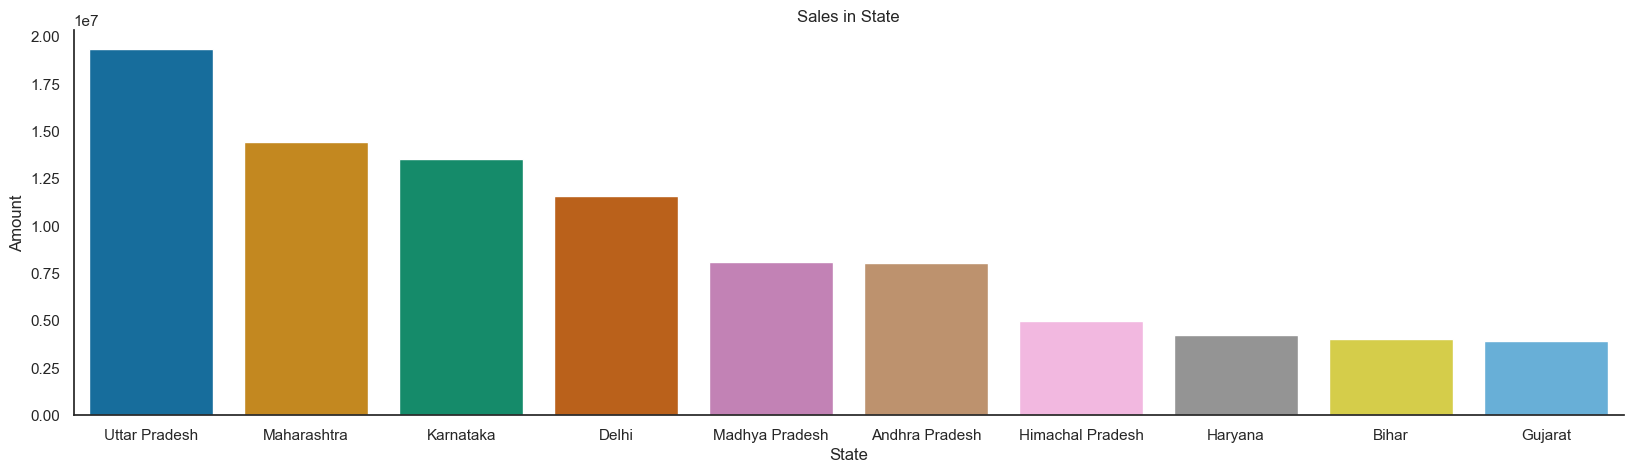

In [20]:
plt.figure(figsize=(20,5))
sns.barplot(data=Sales_State, x='State', y='Amount',hue = 'State',palette='colorblind')
sns.despine()
plt.title("Sales in State")
plt.show()

**Analyze by Marital Status**

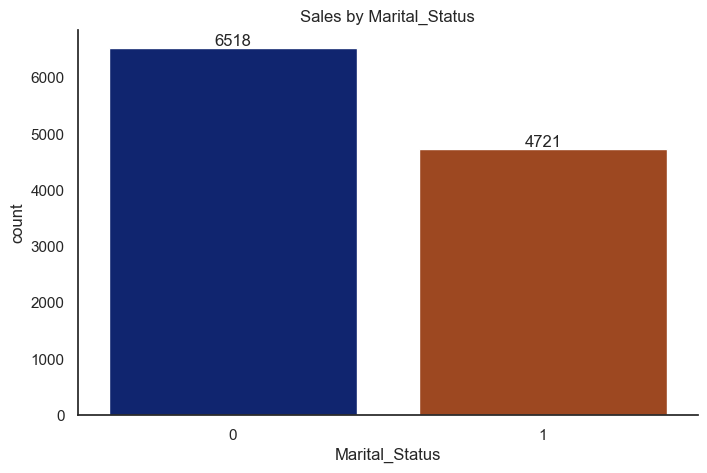

In [21]:
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("white")
ax2 = sns.countplot(x='Marital_Status',hue = 'Marital_Status',data=df,palette='dark',legend=False)
for bars in ax2.containers:
    ax2.bar_label(bars)
plt.title("Sales by Marital_Status")
sns.despine()
plt.show()

In [22]:
sales_marital = df.groupby(['Marital_Status'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
print(sales_marital)

   Marital_Status    Amount
0               0  62125384
1               1  44123745


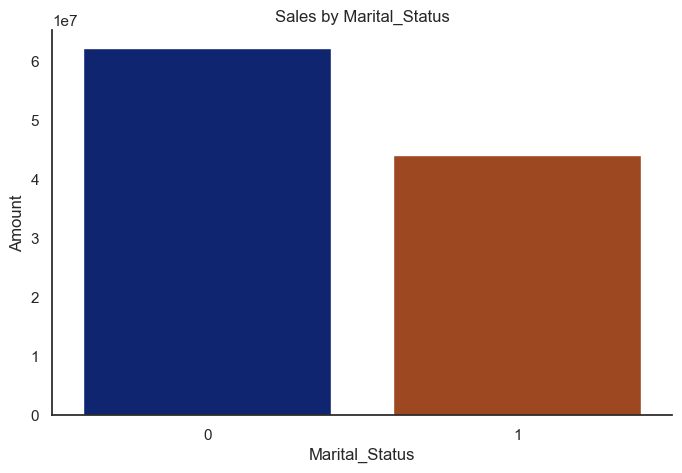

In [23]:
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("white")
sns.barplot(data=sales_marital, x='Marital_Status', y='Amount', hue = 'Marital_Status',palette='dark', legend = False)
sns.despine()
plt.title("Sales by Marital_Status")
plt.show()

**Analyze By Occupation**

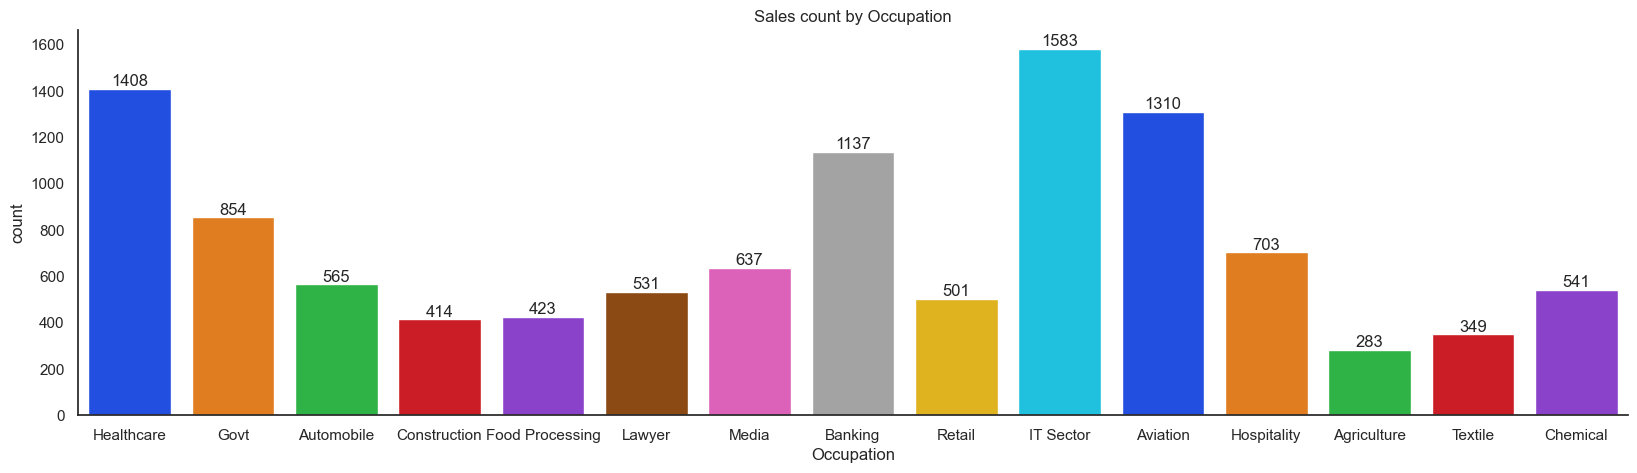

In [24]:
plt.figure(figsize=(20,5))
ax3=sns.countplot(data=df,x='Occupation',hue = 'Occupation',palette='bright')
for bars in ax3.containers:
    ax3.bar_label(bars)
plt.title("Sales count by Occupation")
sns.despine()
plt.show()

In [25]:
Sales_occupations=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
print(Sales_occupations)

         Occupation    Amount
10        IT Sector  14755079
8        Healthcare  13034586
2          Aviation  12602298
3           Banking  10770610
7              Govt   8517212
9       Hospitality   6376405
12            Media   6295832
1        Automobile   5368596
4          Chemical   5297436
11           Lawyer   4981665
13           Retail   4783170
6   Food Processing   4070670
5      Construction   3597511
14          Textile   3204972
0       Agriculture   2593087


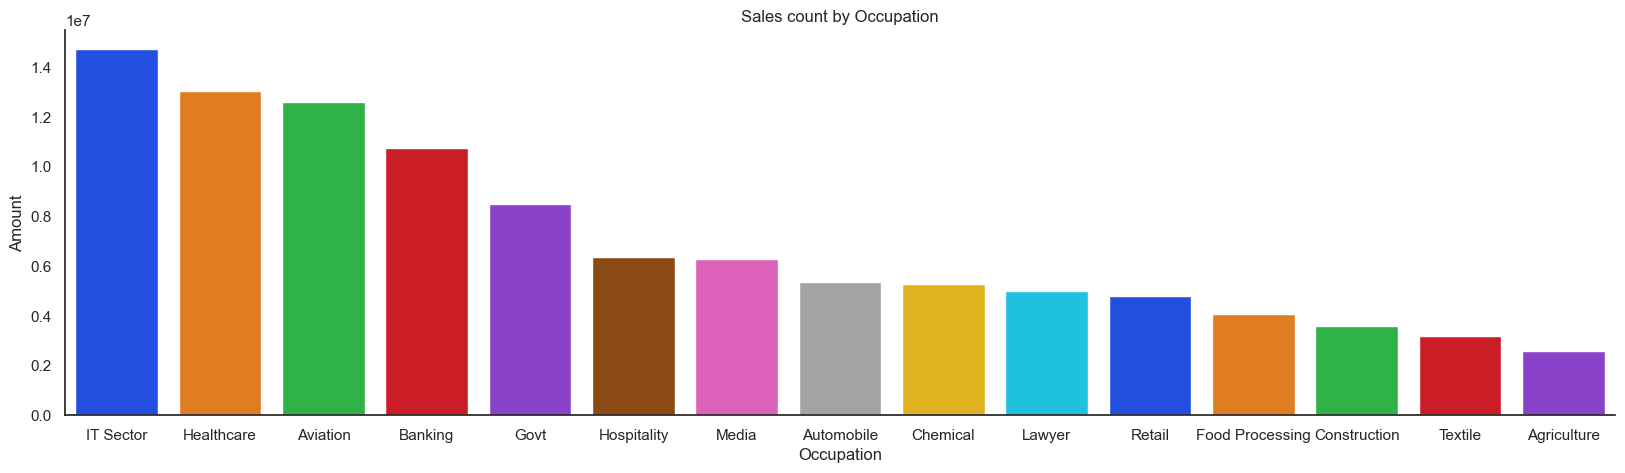

In [26]:
sns.set(rc={'figure.figsize':(20,5)})
sns.set_style("white")
sns.barplot(x='Occupation', y='Amount', data=Sales_occupations,hue='Occupation',palette='bright')
sns.despine()
plt.title("Sales count by Occupation")
plt.show()

**Analyze By Product Category**

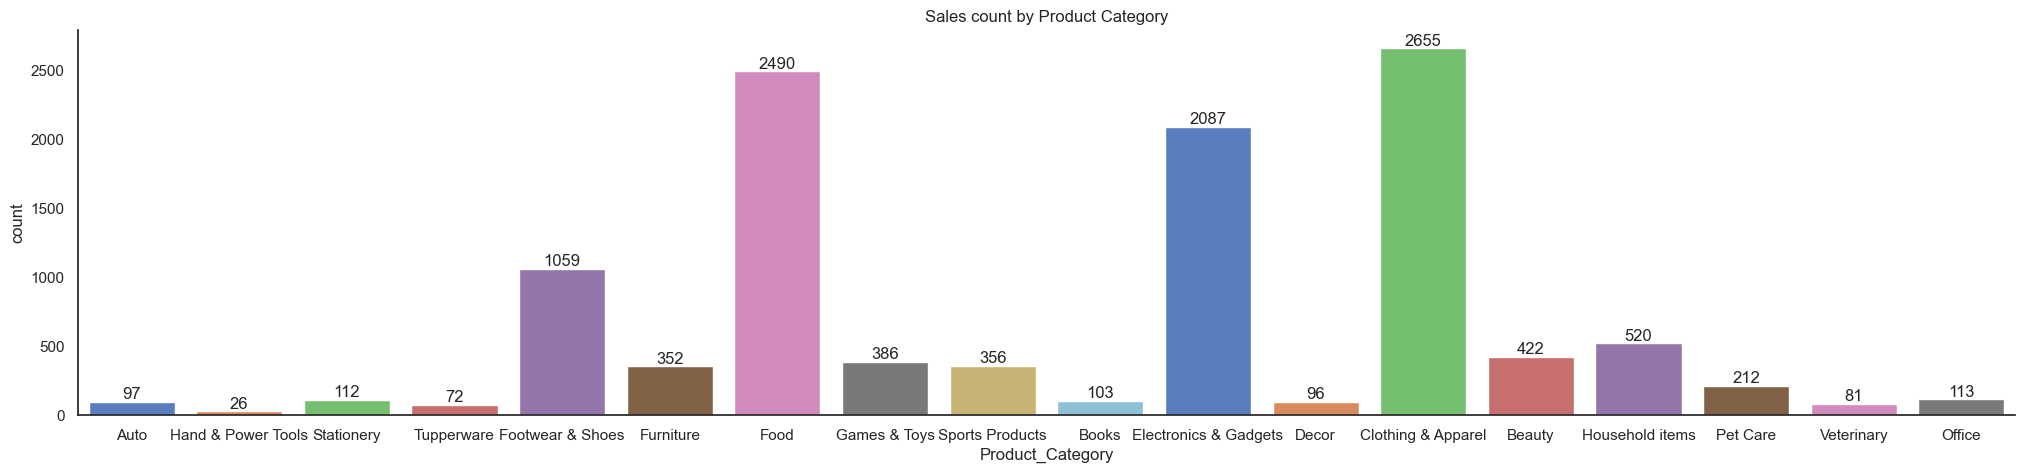

In [27]:
sns.set(rc={'figure.figsize':(25,5)})
sns.set_style("white")
ax4=sns.countplot(x='Product_Category',data=df,hue='Product_Category',palette='muted')
for bars in ax4.containers:
    ax4.bar_label(bars)
plt.title("Sales count by Product Category")
sns.despine()
plt.show()


In [28]:
Sales_Category= df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
print(Sales_Category)

         Product_Category    Amount
6                    Food  33933883
3      Clothing & Apparel  16495019
5   Electronics & Gadgets  15643846
7        Footwear & Shoes  15575209
8               Furniture   5440051
9            Games & Toys   4331694
14        Sports Products   3635933
1                  Beauty   1959484
0                    Auto   1958609
15             Stationery   1676051


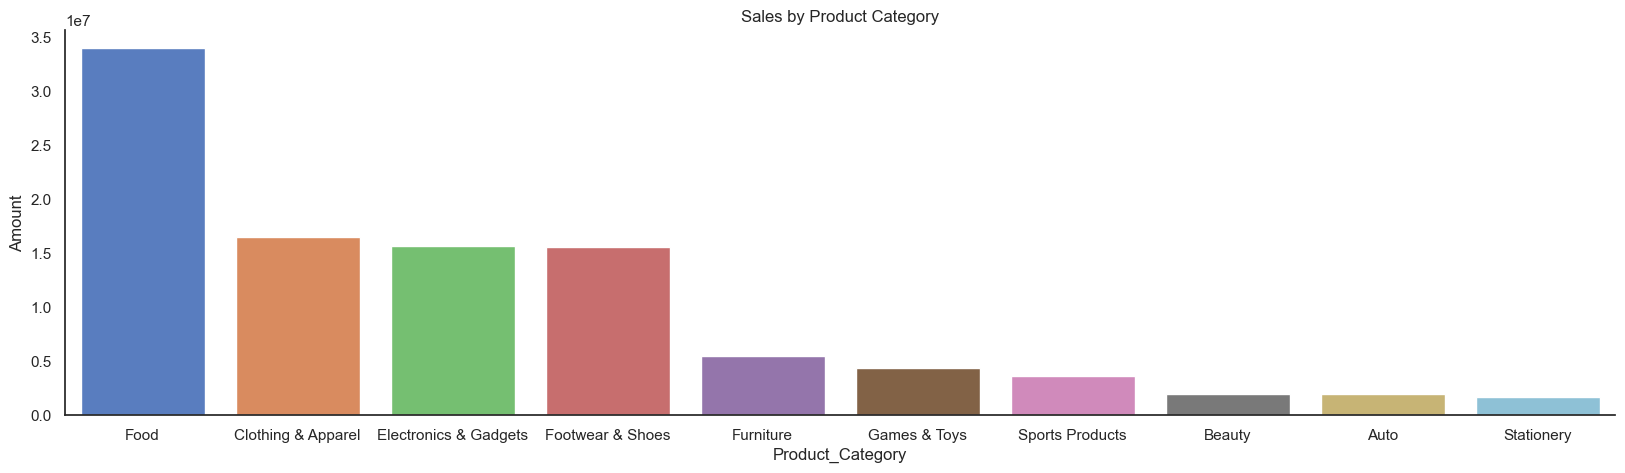

In [29]:
sns.set(rc={'figure.figsize':(20,5)})
sns.set_style("white")
sns.barplot(data=Sales_Category, x = 'Product_Category', y = 'Amount',hue='Product_Category',palette='muted')
sns.despine()
plt.title("Sales by Product Category")
plt.show()

**Analyze By Product_ID**

In [30]:
Sales_ID = df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
print(Sales_ID)

     Product_ID  Orders
1679  P00265242     127
644   P00110942     116
1504  P00237542      91
1146  P00184942      82
171   P00025442      79
679   P00114942      79
888   P00145042      76
708   P00117942      76
298   P00044442      75
643   P00110842      74


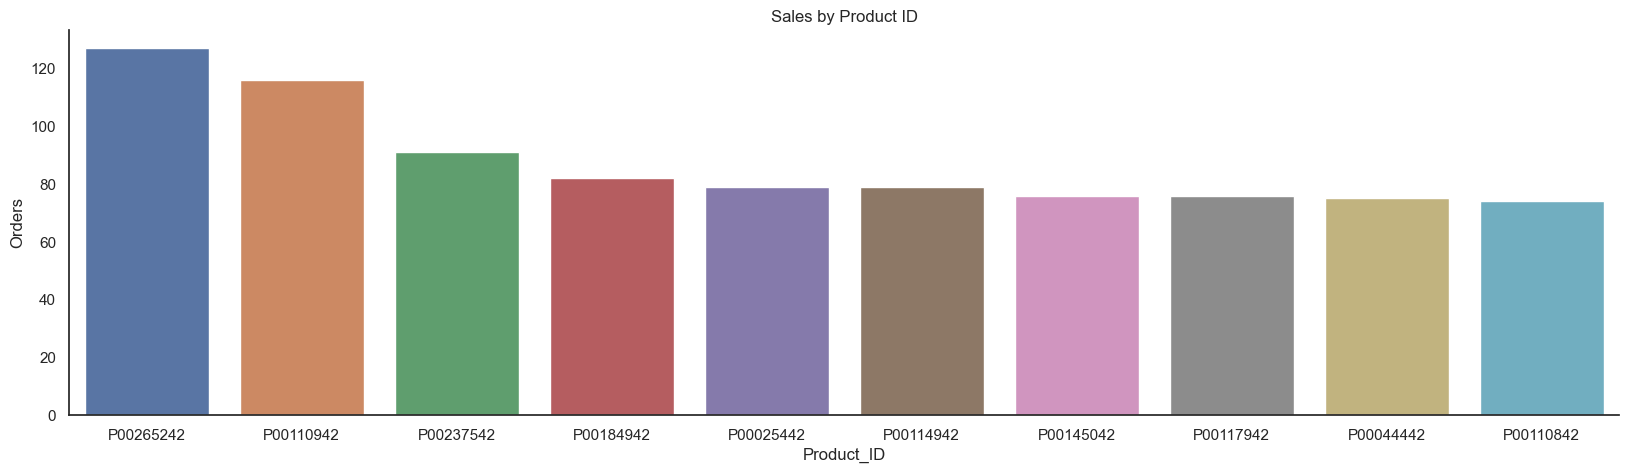

In [31]:
sns.set(rc={'figure.figsize':(20,5)})
sns.set_style("white")
sns.barplot(data=Sales_ID, x='Product_ID',y='Orders',hue='Product_ID',palette='deep')
sns.despine()
plt.title("Sales by Product ID")
plt.show()

__OVERALL ANALYSIS__

*The purchasing of goods in these areas is more likely for married women aged 26 to 35 in UP, Maharastra, and Karnataka who work in IT, healthcare, and aviation*